In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
#load the data set
claimants=pd.read_csv("claimants (1).csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
claimants.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [5]:
claimants.shape

(1340, 7)

In [6]:
#dropping the case number columns as it is not required
claimants.drop(['CASENUM'],inplace=True,axis=1) #inplace = T means within the dataset

In [7]:
claimants.shape

(1340, 6)

In [8]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [9]:
#CLMAGE : outliers are present so replace missing values with median
CLMAGE_Median = claimants['CLMAGE'].median()
print( CLMAGE_Median)
claimants['CLMAGE'].fillna(CLMAGE_Median,inplace=True)

30.0


In [10]:
claimants.isna().sum()

ATTORNEY     0
CLMSEX      12
CLMINSUR    41
SEATBELT    48
CLMAGE       0
LOSS         0
dtype: int64

In [11]:
# CLMSEX, CLMINSUR, SEATBELT : dropping missing values as missing values are in the range of 0 to 5%
claimants.dropna(subset=['CLMSEX', 'CLMINSUR', 'SEATBELT'], inplace=True)
claimants.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [13]:
#Removing NA values in data set
#claimants = claimants.dropna()
claimants.shape

(1269, 6)

In [12]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [14]:
#Dividing our data into input and output varibles
X= claimants.iloc[:,1:] #indepent Variable set - CLMSEX	CLMINSUR	SEATBELT	CLMAGE	LOSS
Y=claimants.iloc[:,0]#Dependent variable set - ATTORNEY

In [15]:
#Logistic Regression and fir the model
Classifier = LogisticRegression()#initialize the model i.e called instance
Classifier.fit(X,Y)#

LogisticRegression()

In [16]:
#Predict for X dataset
y_pred = Classifier.predict(X)

In [17]:
y_pred #y hat values for x

array([0, 1, 1, ..., 1, 0, 1])

In [18]:
y_pred_df=pd.DataFrame({'Y':Y,'Yhat':Classifier.predict(X)})

In [19]:
y_pred_df

,Y,Yhat
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
1335,1,1
1336,0,0
1337,1,1
1338,0,0


In [20]:
#Confusion Matrix for the model accuracy  TP FP
#                                         FN TN
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)


[[412 233]
 [141 483]]


In [22]:
((412+483)/(412+233+141+483))*100 #Accuracy

70.52797478329393

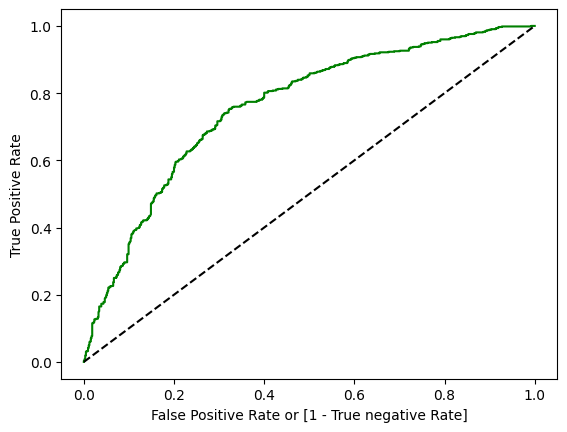

In [23]:
#ROC Curve

from sklearn.metrics import roc_curve #roc-receiver operating characteristic
from sklearn.metrics import roc_auc_score #auc-area under curve

fpr,tpr,thresholds =roc_curve(Y,Classifier.predict_proba(X)[:,1])
#we eant to predict probability values for x data
#predict_proba returns probability

auc = roc_auc_score(Y,y_pred)#compute roc_auc_score based on y and y_pred

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color ="Green")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate or [1 - True negative Rate]")
plt.ylabel("True Positive Rate")
plt.show()

In [24]:
auc

0.706399075730471